## Лабораторная работа 4 - Предварительная обработка данных
Разделы:
1. Загрузка данных
2. Пропуски в данных
3. Нормализация и удаление выбросов
4. Pipeline
5. Тест наших данных с помощью SVM

In [1]:
# подключение библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

%matplotlib inline

### 1. Загрузка данных

**Обратите внимание**  
При загрузки данных мы сразу же выбираем поле для индексации, это нужно для дальнейшего разделения данныех и удаления выбросов в обоих

In [2]:
import pandas as pd

data = pd.read_csv('./Iris.csv', index_col='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### 2. Пропуски в данных  
В исходных даннах могут быть пропуски (None, null, NaN) их надо как то удалять

In [3]:
# Так как в исходных данных нету пропусков то создадим их случайным образом
import random
from numpy import NaN

rnd = random.Random('seed для генератора случайных чисел (можно изменить)')

nan_data = data.copy()
for i in range(nan_data.shape[0]):
    if rnd.randint(0, 100) < 10:
        select_column = rnd.choice(nan_data.columns)
        print(select_column, i)
        nan_data[select_column][i] = NaN

print('\nИзначально')
print(data.dropna().count())
print('\nПосле обработки')
print(nan_data.dropna().count())
nan_data.head(55)

PetalLengthCm 4
SepalWidthCm 11
SepalLengthCm 26
SepalWidthCm 31
Species 42
Species 51
SepalLengthCm 54
SepalLengthCm 91
SepalLengthCm 92
Species 97
PetalWidthCm 115
SepalWidthCm 145

Изначально
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

После обработки
SepalLengthCm    138
SepalWidthCm     138
PetalLengthCm    138
PetalWidthCm     138
Species          138
dtype: int64


C:\Users\Kross\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,NaN,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


#### Удаление пропусков через простое заполнение

In [4]:
# заполнение пропусков константой
nan_data_fill_simple = nan_data.fillna(0)
# В 4 строке появился 0 вместо класса, изначально там был NaN
nan_data_fill_simple.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,0.0,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [5]:
# Удаление пропусков через взятия среднего
nan_data_fill_mean = nan_data.fillna(nan_data.mean())
print(f'Mean: \n{nan_data.mean()}')
nan_data_fill_mean.head(20)

Mean: 
SepalLengthCm    5.852055
SepalWidthCm     3.047619
PetalLengthCm    3.773826
PetalWidthCm     1.190604
dtype: float64


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.500000,1.400000,0.2,Iris-setosa
2,4.9,3.000000,1.400000,0.2,Iris-setosa
3,4.7,3.200000,1.300000,0.2,Iris-setosa
4,4.6,3.100000,3.773826,0.2,Iris-setosa
5,5.0,3.600000,1.400000,0.2,Iris-setosa
6,5.4,3.900000,1.700000,0.4,Iris-setosa
7,4.6,3.400000,1.400000,0.3,Iris-setosa
8,5.0,3.400000,1.500000,0.2,Iris-setosa
9,4.4,2.900000,1.400000,0.2,Iris-setosa


In [6]:
# Удаление пропусков через их заполнения соседнеми значениями
# pad - это метод при котором значение берется с соседней ячейки
nan_data_fill_near_value = nan_data.fillna(method='pad')
nan_data_fill_near_value.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.3,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


Полная документация по pandas.DataFrame.fillna() доступна по ссылке https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

#### Удаление пропусков через интерполяцию

In [7]:
# заполнение пропусков через интерполяцио столбцов с заполнением пропусков
nan_data_interpolate = nan_data.interpolate(method='cubic')
nan_data_interpolate.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.500000,1.400000,0.2,Iris-setosa
2,4.9,3.000000,1.400000,0.2,Iris-setosa
3,4.7,3.200000,1.300000,0.2,Iris-setosa
4,4.6,3.100000,1.231535,0.2,Iris-setosa
5,5.0,3.600000,1.400000,0.2,Iris-setosa
6,5.4,3.900000,1.700000,0.4,Iris-setosa
7,4.6,3.400000,1.400000,0.3,Iris-setosa
8,5.0,3.400000,1.500000,0.2,Iris-setosa
9,4.4,2.900000,1.400000,0.2,Iris-setosa


In [8]:
nan_data_interpolate.dropna().count()

SepalLengthCm    147
SepalWidthCm     147
PetalLengthCm    147
PetalWidthCm     147
Species          147
dtype: int64

**Обратите внимание**  
Интерполяция не спасает от пропусков в случает если они в не числовых данных, так же она не делает экстраполяцию.  
Её лучше всего совмещять вместе с методом fillna для заполнения оставшихся пропусков основываясь на соседях

**Пример**

In [9]:
nan_data_interpolate_fill_near_value = nan_data_interpolate.fillna(method='pad')

In [10]:
nan_data_interpolate_fill_near_value.dropna().count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [11]:
nan_data_interpolate_fill_near_value.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.500000,1.400000,0.2,Iris-setosa
2,4.9,3.000000,1.400000,0.2,Iris-setosa
3,4.7,3.200000,1.300000,0.2,Iris-setosa
4,4.6,3.100000,1.231535,0.2,Iris-setosa
5,5.0,3.600000,1.400000,0.2,Iris-setosa
6,5.4,3.900000,1.700000,0.4,Iris-setosa
7,4.6,3.400000,1.400000,0.3,Iris-setosa
8,5.0,3.400000,1.500000,0.2,Iris-setosa
9,4.4,2.900000,1.400000,0.2,Iris-setosa


In [12]:
# В крайнем случае вы можите просто выкинуть данные с пропусками, но делайте это в самом крайнем случае
nan_data_dropnan = nan_data.dropna()
print(nan_data_dropnan.count())
nan_data_dropnan.head(20)

SepalLengthCm    138
SepalWidthCm     138
PetalLengthCm    138
PetalWidthCm     138
Species          138
dtype: int64


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


### 2. Нормализация  

Нормализация данных это приведение данных в некий стандартный вид

Для алгоритмов машинного обучения это - числовой вид и желательно что бы все числа лежали в диапазоне от -1 до 1 или от 0 до 1
Так же тут необходимо убрать [выбросы (промахи)](https://goo.gl/Xh9kgc) в данных

In [13]:
# Исходные данные
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Как можно видеть ниже мы преобразовали колонку *Species* в 3 колонки к которых записан либо 0 либо 1  
3 колонки потому что в колонки 3 класса (3 разных надписи)  
0 или 1 - это какой клас был изначально

In [14]:
# Первым делом представим строковые данные как числовые
import sklearn.preprocessing as preprocessing

number_data = pd.get_dummies(data)
number_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
Id,,,,,,,
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0


Простая номализация.  
Данных маштабируются на промежуток от 0 до 1, где 0 - минимум в данных, а 1 - это максимум.  
Все остальные находятся между ними

*Обратите внимание на размер оси y на графике*

In [15]:
mm_scalar = preprocessing.MinMaxScaler()
mm_scalar.fit(number_data)
mm_norm_number_data = pd.DataFrame(columns=number_data.columns, data=mm_scalar.transform(number_data))
mm_norm_number_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0


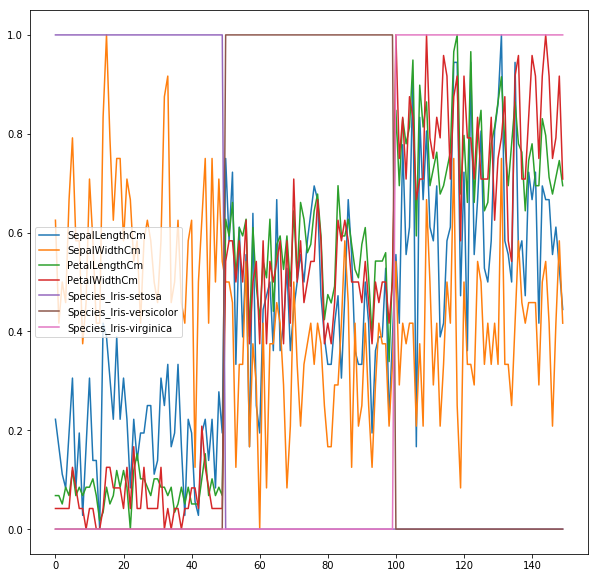

In [16]:
# Данный нормализатор выравнивает данные относительно минимального и максимального
mm_norm_number_data.plot(figsize=(10, 10))

Следующий нормализатор похож на предыдущий, только он маштабирует данные относительно максимального по модулю

In [17]:
# Данный нормализатор выравнивает данные относительно максимально
ma_scaler = preprocessing.MaxAbsScaler()
ma_scaler.fit(number_data)
ma_norm_data = pd.DataFrame(columns=number_data.columns, data=ma_scaler.transform(number_data))

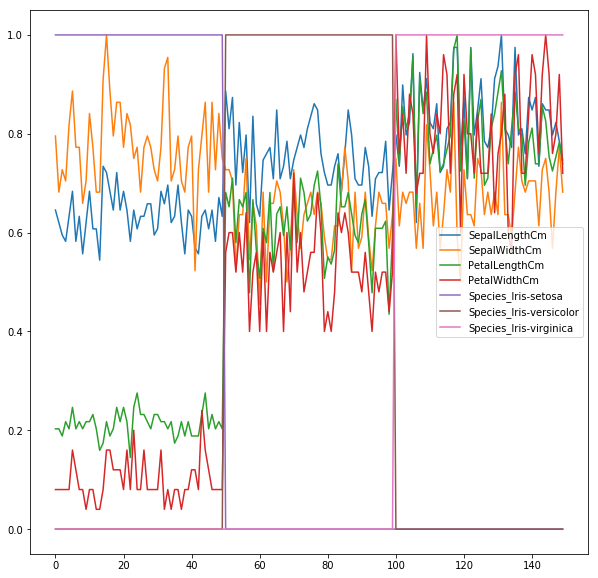

In [18]:
ma_norm_data.plot(figsize=(10, 10))

Это более продвинутая нормализация, она использует статистику для определения центра в данных (мат. ожинания) и висперсии данных и в соответствие с этим маштабирует данные

In [19]:
# Нормализация на основе дисперсии и мат. ожидания
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(number_data)
std_norm_data = pd.DataFrame(columns=number_data.columns, data=std_scaler.transform(number_data))

**Обратите внимание**  
Данные хоть и маштабированы, но они не лежат в диапазоне от -1 до 1, а привышают его. Тут можно испоьзовать дополнительно *MinMaxScaler*

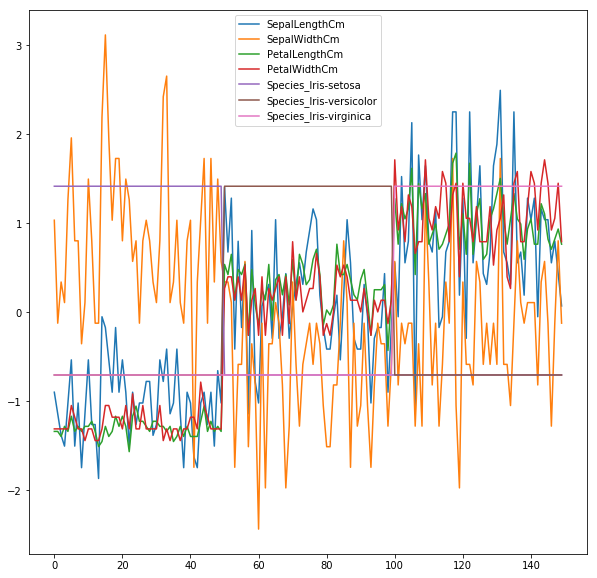

In [20]:
std_norm_data.plot(figsize=(10, 10))

Данный нормализатор похож на предидущий, только он в добавок ко всему убирает выбросы (промахи) в данных

In [21]:
# Нормализация на основе дисперсии и мат. ожидания c удалением выбросов
std_clear_scaler = preprocessing.RobustScaler()
std_clear_scaler.fit(number_data)
std_clear_norm_data = pd.DataFrame(columns=number_data.columns, data=std_clear_scaler.transform(number_data))

Тут все те же проблемы, что и у *StandartScaler*

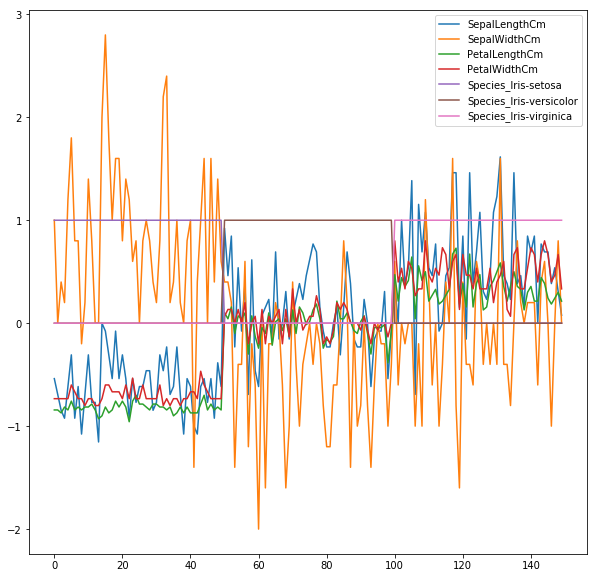

In [22]:
std_clear_norm_data.plot(figsize=(10, 10))

### 4. Pipeline  

Pipeline - это обект который умеет обединять в себе несколько препроцессоров для данных превращая их в один

Давайте напишем свой pipeline для обработки наших входных данных

Для начала давайте напишем несколько наших препроцессоров
1. препроцессор для удаления выбросов написаный руками. Для его реализации будем использовать правило 3-х сигм для нормального распределния
2. простой препроцессор для преобразования обекта DataFrame в ndarray

In [23]:
# создадим свой препроцессор
import sklearn.pipeline as pipeline
from sklearn.base import BaseEstimator, TransformerMixin


class DropOutlet(BaseEstimator):
    """
    Удаление выбросов, основываясь на правиле 3-х сигм (только для нормального распределения)
    """
        
    def fit(self, X: pd.DataFrame, y=None):
        """
        Получаем стандартное отклонение для каждого столбца и сохраняем их        
        """
        data.select_dtypes(include=['float', 'int'])
        self.std = X.std()
        self.columns = self.std.index.values
        return self
    
    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """
        Убираем все здачения, котоые находятся дальше 3-х стандартных отконений (сигма) от мат. ожидания случайной величины
        """
        X_cols = X[self.columns]
        return X[ (X_cols - X_cols.mean()).abs() <= 3*self.std ].dropna()

class PandasToNumpy(BaseEstimator):
    """
    Просто преобразует данные из DataFrame от pandas к матрице от numpy (ndarray)
    """
    
    def fit(self, X : pd.DataFrame = None, y=None):
        return self
    
    def transform(self, X: pd.DataFrame, y=None) -> np.ndarray:
        return X.values
    
class SparseToArray(TransformerMixin, BaseEstimator):
    """
    Класс преобразует sparse matrix в ndarray
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.toarray()

class ModifyLabelEncoder(preprocessing.LabelEncoder):
    """
    Стандартный костыль для препроцессора LabelEncoder
    """
    
    def fit(self, X, y=None):
        return super().fit(X)
    
    def transform(self, X, y=None):
        print(1)
        return super().transform(X)
    
    def fit_transform(self, X, y=None):
        return super().fit_transform(X)

Наш pipeline будет состоять из:
1. DropOutlet - шаш класс для удаления выбросов
2. Конвертация из DataFrame в ndarray
3. Нормализация с помощью препроцессора MinMaxScaler

У pipeline обектов есть 3 метода:
- fit - тренирует обект. Тут происходит запоминание особенностей данных если они нужны
- transform - непосредственное преобразует данные
- fit_transform - вначале тренирует, а потом преобразует

In [30]:
# Создадим наш pipeline
# drop_outlet, to_matrix, norm - это просто названия препроцессоров данное пользователем
# выбираем данные для обучающей выборки (то что будет подано на вход алгоритмам машинного обучения)
X_data = data[data.columns[:-1]].copy()
# Кодируем все классы в виде единичных векторов
X_data = pd.get_dummies(X_data)

# выбираем данные для обучающей выборки (то что будет на выходу алгоритмов машинного обучения)
Y_data = data[data.columns[-1]].copy()

# Убираем вылеты из данных
pipe_outlet = pipeline.Pipeline([
    ('drop_outlet', DropOutlet()),
])

outletless_data_X = pipe_outlet.fit_transform(X_data)

# Соглачуем два массива X и Y
# Записи которые были удалены из массива X должны быть удалены и из массива Y
# Для удаления записей мы берем индексы из массива X и оставляем записи в массиве Y с индексами, которые есть в X
outletless_data_Y = Y_data[ Y_data.index.isin(outletless_data_X.index) ]

# Нормализуем данные X
pipe_x = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('norm', preprocessing.MinMaxScaler())
])

# Нормализуем данные Y
pipe_y = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('label_encoder', ModifyLabelEncoder()),
])

# вызываем препроцессоры
number_data_ready_X = pipe_x.fit_transform(outletless_data_X)
number_data_ready_Y = pipe_y.fit_transform(outletless_data_Y)

print(number_data_ready_X.shape, number_data_ready_Y.shape)

(149, 4) (149,)


In [26]:
number_data_ready_X[:5,:], number_data_ready_Y

(array([[0.22222222, 0.68181818, 0.06779661, 0.04166667],
        [0.16666667, 0.45454545, 0.06779661, 0.04166667],
        [0.11111111, 0.54545455, 0.05084746, 0.04166667],
        [0.08333333, 0.5       , 0.08474576, 0.04166667],
        [0.19444444, 0.72727273, 0.06779661, 0.04166667]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))

Как можно видеть выше мы получили на выходе многомерный массив. именно его и мы будем в дальнейшем подавать на вход для алгоритмов машинного обучения

Для знакомства с массивами из библиотеки NumPy воспользуйтесь ссылкой http://cs231n.github.io/python-numpy-tutorial/

### Проверяем наши обработанные данные
**Делать это не надо это просто демонстрация, что можно делать дальше**

In [27]:
from sklearn.svm import SVC

svm = SVC(verbose=True, C=1.0, max_iter=200, tol=1e-12)

Y = number_data_ready_Y
X = number_data_ready_X
print(X.shape, Y.shape)

svm.fit(X, Y)

svm.score(X, Y)

(149, 4) (149,)
[LibSVM]

0.9664429530201343

In [28]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf(xx, yy)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


(149, 2)


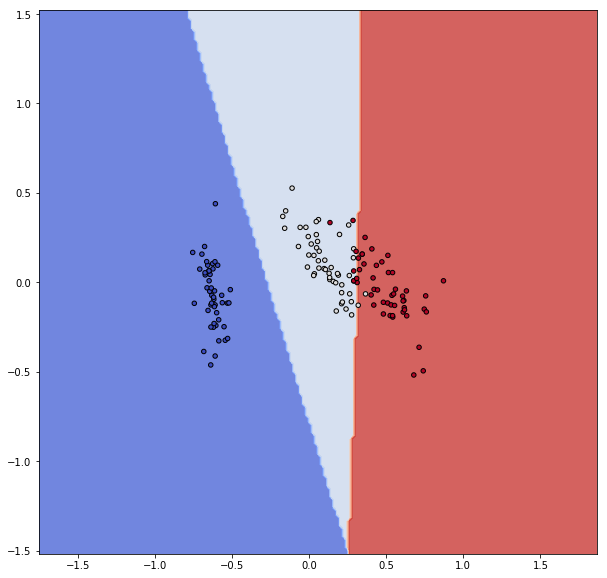

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

_X = pca.fit_transform(X)
print(_X.shape)

clf_predict = lambda xx, yy: svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

X0, X1 = _X[:, 0], _X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')